# XAI in Healthcare

## Table of Contents

1. Overview
2. Q&As
3. Dependencies
4. Data
5. Model Training
6. Model Evaluation
7. Model Interpretation
8. Summary
9. Exercises

## 1. Overview

Diabetes is a chronic, metabolic disease characterized by elevated levels 
of blood glucose (or blood sugar), which leads over time to serious damage to the 
heart, blood vessels, eyes, kidneys and nerves. There are different kinds of diabetes 
diseases and, sadly, a lot of people can be living with at least one of them without knowing it.

The issue is so pronounced that the International Diabetes Federation said

> The IDF Diabetes Atlas (2021) reports that 10.5% of the adult population (20-79 years) 
has diabetes, with almost half unaware that they are living with the condition. By 2045, 
IDF projections show that 1 in 8 adults, approximately 783 million, will be living with 
diabetes, an increase of 46%.

That said, imagine we could turn to machine learning to help us detect who might be diabetic 
and not know it, or who could be closer to becoming one? Wouldn't that be not only ideal, but also 
desirable by everyone? I think it is but it is important to keep in mind that a simple message 
with "Hey, just wanted to tell that you have diabetes!" won't suffice. Context and a good explanation 
will go a long way and can also provide the patient with useful information for his/her/their loved 
ones, should some of the variables causing the illness were to be highly hereditary.

With this overview out of the way, let's examine some questions our patients may want to know.

## 2. Q&As

When talking to a professional that used an algorithm to tell me if I am sick or not, I would 
most certainly ask the following (at the very least).

1. Why did I get flagged as diabetic or potentially becoming one in the near future?
2. What led to this conclusion?
3. What should I do next?

Some potential answers "I" would like to hear if my doctor was telling me that I have diabetes 
would be:
1. Your level of glucose was extremely high and this, and other variables, contributed towards 
flagging you as having diabetes. If you had a fasting blood glucose test, a level between 70 
and 100 mg/dL (3.9 and 5.6 mmol/L) is considered normal. Yours was at 130.
2. The combination of high glucose and blood preassure, your age, and your skin thickness, increased 
the likelihood of you having diabetes when compare to other patients similar to you.
3. We would need to first have you take a few tests to figure out if you this is a false positive or 
if you indeed have diabetes and, if so, of which kind (type I or type II). In addition, we would 
be giving you guidelines and steps to take to bring your glucose to normal levels, and we will also 
ask you to come again soon for more regular check ups.

More or less that would make me feel a bit more positive about the situation. Nonetheless, there are 
many factors leading to diabetes that would take too long to go over so let's get started with our 
example. 😎

## 3. Dependencies

Here are the packages we will be using for this examples.

- `scikit-learn`
- `pandas`
- `joblib`
- `matplotlib`
- `alibi`
- `statsmodels`
- `mlserver`

!pip install scikit-learn pandas joblib matplotlib alibi numpy rich mlserver

## 4. Data

The dataset we will be using can be downloaded from kaggle 
[here](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset). It is 
an abreviated version from the **National Institute of Diabetes and Digestive and Kidney 
Diseases**. This dataset contains a very specific information such as all femaile, over 21, 
and from a particular region of India, but it can serve as a starting point for a much 
larger project with many more variables.

Why it matters? Machine learning is great at finding patterns in the data, and we should use 
this tools, with the appropriate measures in place, as best we can to enhance human life. A lot 
of illnesses become fatal ones due to late detection, therefore, if there is a way to help people 
of all backgrounds while keeping their information and rights safe and intact, we should be doing 
what we can to push the needle forward.

Description or dictionary of variables.
- `Pregnancies` - number of pregnancies.
- `Glucose` - glucose level.
- `BloodPressure` - blood pressure.
- `SkinThickness`
- `Insulin` - level of insulin in the blood.
- `BMI` - body ass index.
- `DiabetesPedigreeFunction`
- `Age`
- `Outcome` - target variable.

Let's get started evaluating loading and evaluating our data.

In [1]:
from sklearn.model_selection import train_test_split
from rich import print
import pandas as pd

In [2]:
df = pd.read_csv('data/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1).copy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

## 5. Model Training

For this section, we will use a logistic regression because of its high degree of interpretability 
and ease of use via the packages described two sections back.

If you have never used a logistic regression before, you can think of it as a classification 
algorithm used to predict a binary outcome (e.g. 1 or 0, white or black, cat or not cat, etc).

For a quick example, suppose you are an instructor that wants to predict if a student will 
pass an exam (a binary, yes/no outcome) based on hours studied, previous grades, and, 
potentially, other variables. Your process might look as follows.

1. Convert the output to a probability value between 0-1. This will represent the chance of passing.

2. Use a linear model to combine the input features and calculate a 'score'. 
    
    $score = Intercept + HoursStudied * \beta_1 + PreviousGrades * \beta_2$

3. Step 3: Convert this score to a probability using the logistic function:
    
    $probability = \frac{1}{(1 + e^{(-score)})}$
    This squashes the score to between 0 and 1.

4. If probability > 0.5, predict the student will pass. Otherwise predict they will fail. The 
probabilities provide a measure of confidence in the binary predictions.

While the above example is a shorter version of the process, my hope is that it gives you an intuition 
for how the method works in practice. 

Now, let's train our model.

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(rc={'figure.figsize':(11.7,8.27)})

Feel free to experiment with the parameters below.

In [6]:
lr_cls = LogisticRegression(random_state=0, max_iter=500, verbose=0)

In [7]:
lr_cls.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

If you don't have the path below, you can create with the following command in the termianl.

```sh
mkdir -p models/diabetes/
```

In [8]:
model_path = 'models/diabetes/lr_cls_diabetes.pkl'

In [9]:
joblib.dump(lr_cls, model_path)

['models/diabetes/lr_cls_diabetes.pkl']

In [10]:
lr_cls = joblib.load(model_path)

Let's do a quick sanity check before we move on to thoroughly evaluating our model. For this, we will 
pick a random sample from the test dataset.

In [11]:
x = X_test.sample(1)
y = y_test[x.index[0]]
print(y)
x

0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
698,4,127,88,11,155,34.5,0.598,28


In [12]:
lr_cls.classes_

array([0, 1])

In [13]:
lr_cls.predict_proba(x)

array([[0.69186038, 0.30813962]])

In [14]:
y_pred = lr_cls.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)

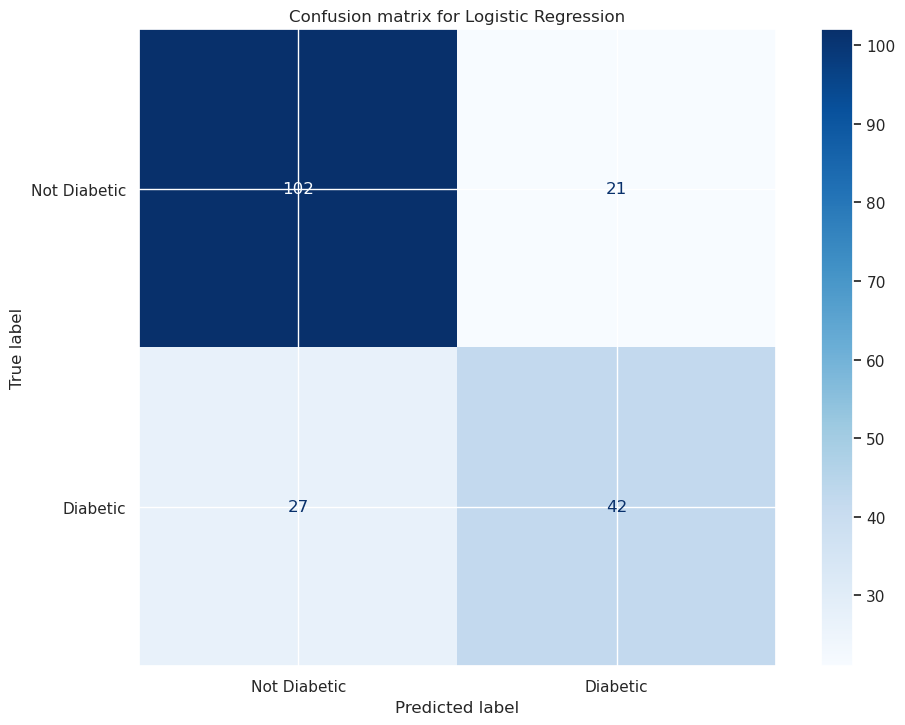

In [18]:
title = 'Confusion matrix for Logistic Regression'
disp = ConfusionMatrixDisplay.from_estimator(
    lr_cls, X_test, y_test, 
    display_labels=['Not Diabetic', 'Diabetic'],
    cmap=plt.cm.Blues, normalize=None
)
disp.ax_.set_title(title);

## 6. Model Evaluation

The first method we will explore is called [Kernel SHAP](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html#:~:text=Kernel%20SHAP%20is%20a%20method,modelfunction%20or%20iml.Model).

> It is a model interpretation method that explains individual predictions by determining 
the contribution of each feature. It uses concepts from game theory and local surrogate models 
to quantify feature importance.

Here's an analogy to understand Kernel SHAP:

Imagine a fruit smoothie prediction model. The ingredients are bananas, strawberries, yogurt, 
and ice. The model predicts how sweet the smoothie will taste.

To explain an individual prediction, Kernel SHAP is like asking:

"How much did each ingredient contribute to the overall sweetness?" 

It determines the SHAP value, or impact, of each feature by comparing smoothies with and without 
that ingredient. Bananas may get a high positive SHAP value because they make smoothies much 
sweeter. Ice may have a negative SHAP value since it dilutes the sweetness. By summing the SHAP 
values for all features, Kernel SHAP explains the total predicted sweetness. It reveals why 
the model predicted that particular level of sweetness given those ingredients.

Like this, Kernel SHAP attributes the prediction of any complex model to each input feature. The 
analogy helps convey how it quantifies each feature's contribution, like ingredients in a recipe. This 
makes model behavior more interpretable.

You can learn more about Kernel Shap [here](https://docs.seldon.io/projects/alibi/en/stable/examples/kernel_shap_wine_intro.html).

Let's get started implementing `KernelShap`.

In [19]:
from alibi.explainers import KernelShap
import numpy as np

In [20]:
explainer = KernelShap(lr_cls.predict_proba, task='classification')

Explainers in Alibi work in the same fashion as estimators in sklearn, that is, they follow the 
`.fit()` and `.predict()` way of doing things so if you are familiar with sklearn, this step will 
feel familiar to you.

In [21]:
explainer.fit(X_train)

Large datasets can cause slow runtimes for shap. The background dataset provided has 576 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KernelShap(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'identity',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': None,
              'transpose': False,
              'kwargs': {}}
            ,
  'version': '0.9.4'}
)

Once we finish creating an explainer, the object we get back gives us a lot of useful information like the one above.

Note that, running an explainer in a large batch of data can be quite compute intensive (depending on the 
explainer of course), so it is good practice to save your models once your code finishes creating them. Let's 
save ours, load it and test it again.

In [22]:
explainer_path = 'models/diabetes/lr_cls_explainer.pkl'

In [23]:
joblib.dump(explainer, explainer_path)

['models/diabetes/lr_cls_explainer.pkl']

In [24]:
explainer = joblib.load(explainer_path)

In [25]:
x = X_test.sample(1)
y = y_test[x.index].iloc[0]
print(y)
x

1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
152,9,156,86,28,155,34.3,1.189,42


In [26]:
features = X_train.columns.to_list()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

As you might have noticed in the metadata returned to us once we trained our model, `KernelShap` is both 
local and global, which means that it can be applied to one or many samples at a time. Let's try it on our 
random sample from above.

In [27]:
result = explainer.explain(x)

  0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
result

Explanation(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'identity',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': False,
              'transpose': False,
              'kwargs': {}}
            ,
  'version': '0.9.4'}
, data={
  'shap_values': [array([[-0.11546255, -0.28077157,  0.03870063, -0.00111757,  0.01664897,
        -0.04046945, -0.11483773, -0.02636004]]), array([[ 0.11546255,  0.28077157, -0.03870063,  0.00111757, -0.01664897,
         0.04046945,  0.11483773,  0.02636004]])],
  'expected_value': array([0.6545117, 0.3454883]),
  'categorical_names': {},
  'feature_names': [],
  'raw': {
           'raw_prediction': array([[0.13084239, 0.86915761]]),
           'prediction': array([1]),
           'instanc

What we're interested in is the `shap_values` returned by our explainer. Let's see what these look like.

In [29]:
result.shap_values[1]

array([[ 0.11546255,  0.28077157, -0.03870063,  0.00111757, -0.01664897,
         0.04046945,  0.11483773,  0.02636004]])

In [30]:
def plot_importance(feat_imp, feat_names, class_idx):
    df = pd.DataFrame(data=feat_imp, columns=feat_names).sort_values(by=0, axis='columns')
    feat_imp, feat_names = df.values[0], df.columns
    fig, ax = plt.subplots(figsize=(10, 5))
    y_pos = np.arange(len(feat_imp))
    ax.barh(y_pos, feat_imp)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feat_names, fontsize=15)
    ax.invert_yaxis()
    ax.set_xlabel(f'Feature effects for class {class_idx}', fontsize=15)
    return ax, fig

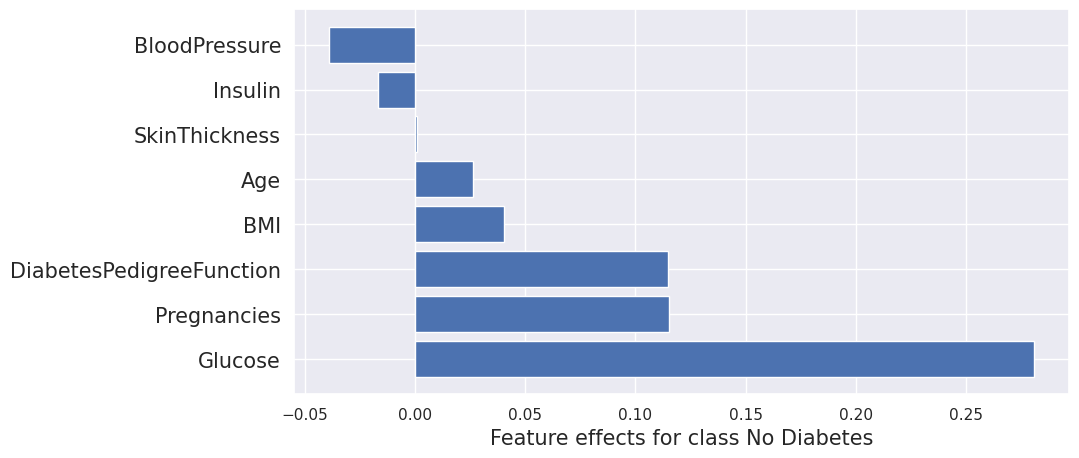

In [31]:
plot_importance(result.shap_values[1], features, 'No Diabetes');

In [32]:
import shap

In [33]:
result = explainer.explain(X_train[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


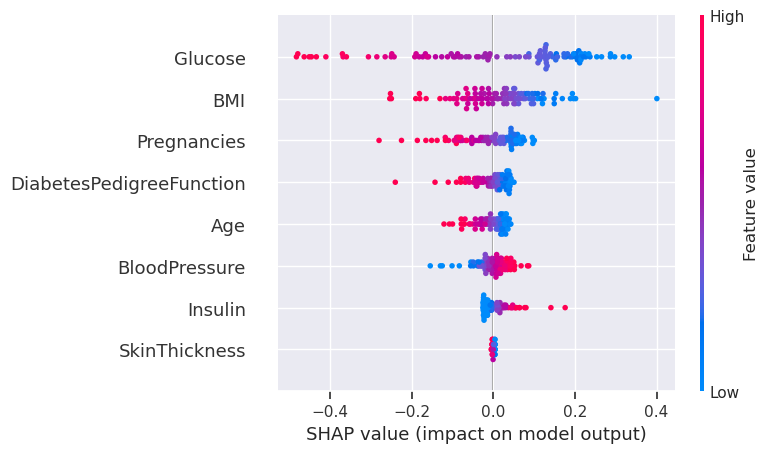

In [34]:
shap.summary_plot(result.shap_values[0], X_train[:100], features);

A positive SHAP value means the feature pushed the output higher. Negative means it pushed the output lower.

It is important to note that, if we train the explainer on a large amount of data (with some compute expenses), the 
explainer would have learned enough about the model globally to locally explain the interactions for new cases.

## 7. Model Interpretation

While the explainer method we choose, Kernel Shap, to explain our model is considered a black-box method, 
because we choose a logistic regresion as our class, we can also interrogate each of the coefficients of our 
model and interpret further the result we got.

To do this, we will make use of `statsmodels` to fit a model again because it has a very nice summary table.

In [35]:
import statsmodels.api as sm

In [36]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.448604
         Iterations 7


In [37]:
print(log_result.summary2())

Results: Logit
==========================================================================
Model:                 Logit               Method:              MLE       
Dependent Variable:    Outcome             Pseudo R-squared:    0.304     
Date:                  2023-09-15 00:09    AIC:                 534.7916  
No. Observations:      576                 BIC:                 573.9965  
Df Model:              8                   Log-Likelihood:      -258.40   
Df Residuals:          567                 LL-Null:             -371.29   
Converged:             1.0000              LLR p-value:         2.2933e-44
No. Iterations:        7.0000              Scale:               1.0000    
--------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------------
const                    -9.2585   0.8823 -10.4939 0.0000 -10.9877 -7.5293
Pregnancies               0.1352   0.0383   3.5324 0.0004   0.0602  0.2103
Glucose                   0.0406   0.0047   8.7366 0.0000   0.0315  0.0498
BloodPressure            -0.0157   0.0063  -2.5078 0.0122  -0.0280 -0.0034
SkinThickness             0.0006   0.0083   0.0746 0.9405  -0.0157  0.0169
Insulin                  -0.0016   0.0010  -1.5356 0.1246  -0.0036  0.0004
BMI                       0.0931   0.0173   5.3868 0.0000   0.0592  0.1270
DiabetesPedigreeFunction  1.0846   0.3675   2.9510 0.0032   0.3643  1.8050
Age                       0.0188   0.0113   1.6541 0.0981  -0.0035  0.0410
==========================================================================

In the table above we can examine not only the coefficients of each parameter, but also the standard deviation and 
AIC and BIC values of our model.

Because the coefficients are the logarithms of the odds (i.e. the probability of a positive case over 
the probability of a negative case), we can convert them back into exponentials to get a better sense of 
what each value means.

In [38]:
np.exp(log_result.params).sort_values(ascending=False)

DiabetesPedigreeFunction    2.958285
Pregnancies                 1.144798
BMI                         1.097590
Glucose                     1.041473
Age                         1.018949
SkinThickness               1.000619
Insulin                     0.998413
BloodPressure               0.984430
const                       0.000095
dtype: float64

What do the odds mean for a diabetic patient? It means that the odds of having Diabetes increase by a factor of 2.95 for each additional unit of DiabetesPedigreeFunction, or by 1.14 for every new pregnancy, provided every other feature stays unchanged.

We need more context for this, and that can be achieved with the standard deviation.

In [39]:
coefs = log_result.params.drop(labels=['const'])
stdv = np.std(X_train, 0)
abs(coefs * stdv).sort_values(ascending=False)

Glucose                     1.279648
BMI                         0.754259
Pregnancies                 0.459279
DiabetesPedigreeFunction    0.343414
BloodPressure               0.305852
Age                         0.221264
Insulin                     0.185982
SkinThickness               0.009797
dtype: float64

The preceding table can be interpreted as an approximation of risk factors from high to low 
according to the model. It is also a model-specific feature importance method, and a global one 
at that (as it was gather from a group of samples). It tells us how far away from the mean each of 
these values are.

## 8. Summary

1. Explainable AI (XAI) is a set of techniques and methods that enable machine learning models 
to provide clear, understandable, and human-interpretable explanations for their predictions, 
helping users develop trust and make informed decisions based on machine learning outputs.

2. Kernel SHAP is a specific XAI method that attributes the impact of each input feature on a 
model's prediction by using a game theoretic framework, providing insights into how features 
influence the model's outcomes.

3. Logistic regression is a statistical model commonly used in machine learning for binary 
classification tasks. It estimates the probability of a binary outcome by fitting a linear 
function to input features and applying a logistic (sigmoid) transformation.

4. XAI can be used to enhance transparency, accountability, and trust in AI systems, 
especially in critical domains like healthcare, where decisions based on AI can have significant 
real-world consequences. XAI helps uncover the black-box nature of complex models and makes 
their reasoning accessible to human experts.

5. Machine Learning can assist in diagnosing diseases in deceased individuals by analyzing medical data, 
potentially improving the accuracy and efficiency of diagnoses.

In [ ]:
from mlserver.codecs import NumpyCodec
import requests

In [ ]:
x.values

In [ ]:
inf_request = {
    'inputs': [
        NumpyCodec.encode_input(name='payload', payload=x.values).dict()
    ]
}
print(inf_request)

In [ ]:
model = 'diabetes_explainer'
endpoint = f"http://0.0.0.0:8080/v2/models/{model}/infer"
r = requests.post(endpoint, json=inf_request)
r.json()

## 10. Exercises